<a href="https://colab.research.google.com/github/rebaJesudoss/reliance_stock_price_prediction/blob/main/reliance_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import os as os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
%matplotlib inline

In [60]:
from google.colab import files
uploaded = files.upload()

Saving reliance.xlsx to reliance (3).xlsx


In [61]:
import io
data = pd.read_excel(io.BytesIO(uploaded['reliance.xlsx']))
data

,Date,Open Price,High Price,Low Price,Close Price,Deliverable Qty
0,2010-01-04,1091.10,1091.1,1021.85,1075.50,14348117
1,2010-01-05,1149.90,1149.9,1065.40,1070.70,2861065
2,2010-01-06,1079.90,1094.5,1070.65,1088.00,2539975
3,2010-01-07,1088.00,1115.0,1078.00,1106.05,2522438
4,2010-01-08,1108.00,1113.8,1096.00,1103.15,1253746
...,...,...,...,...,...,...
2716,2020-12-24,1947.00,1998.8,1945.90,1994.15,2141157
2717,2020-12-28,2006.70,2018.0,1995.30,2003.30,1821777
2718,2020-12-29,2009.00,2012.3,1982.55,1990.05,3009732
2719,2020-12-30,1995.25,2007.2,1975.55,1995.50,3159950


In [62]:
data['Date']=pd.to_datetime(data['Date'])

In [63]:
train=data.iloc[:,1:2].values
print(train)
print(train.shape)

[[1091.1 ]
 [1149.9 ]
 [1079.9 ]
 ...
 [2009.  ]
 [1995.25]
 [1993.5 ]]
(2721, 1)


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range= (0,1))
scaled_train = scaler.fit_transform(train)
scaled_train

array([[0.25218182],
       [0.28781818],
       [0.24539394],
       ...,
       [0.80848485],
       [0.80015152],
       [0.79909091]])

In [65]:
x_train=[]
y_train=[]
for i in range(60,2721):
    x_train.append(scaled_train[i-60:i,0])
    y_train.append(scaled_train[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(2661, 60)
(2661,)


In [66]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2661, 60, 1)

In [67]:
#!pip install keras
#!pip install TensorFlow
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [68]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units=50, return_sequences= True)) 
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout (0.2))

#regressor.add(LSTM(units = 50, return_sequences= True))
#regressor.add(Dropout (0.2))

#regressor.add(LSTM(units = 50, return_sequences= True))
#regressor.add(Dropout (0.2))

#regressor.add(LSTM(units = 50, return_sequences= True))
#regressor.add(Dropout (0.2))

#regressor.add(LSTM(units = 50, return_sequences= True))
#regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout (0.2))

regressor.add(Dense (units=1))

In [69]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
84/84 [==============================] - 18s 130ms/step - loss: 0.0092
Epoch 2/100
84/84 [==============================] - 11s 125ms/step - loss: 0.0033
Epoch 3/100
84/84 [==============================] - 11s 126ms/step - loss: 0.0033
Epoch 4/100
84/84 [==============================] - 11s 128ms/step - loss: 0.0032
Epoch 5/100
84/84 [==============================] - 11s 125ms/step - loss: 0.0026
Epoch 6/100
84/84 [==============================] - 11s 128ms/step - loss: 0.0024
Epoch 7/100
84/84 [==============================] - 11s 129ms/step - loss: 0.0025
Epoch 8/100
84/84 [==============================] - 10s 124ms/step - loss: 0.0020
Epoch 9/100
84/84 [==============================] - 11s 125ms/step - loss: 0.0021
Epoch 10/100
84/84 [==============================] - 11s 129ms/step - loss: 0.0018
Epoch 11/100
84/84 [==============================] - 11s 126ms/step - loss: 0.0017
Epoch 12/100
84/84 [==============================] - 11s 126ms/step - loss: 0.0017
E

In [70]:
from google.colab import files
uploaded = files.upload()

Saving reliance_2021_actual.csv to reliance_2021_actual (3).csv


In [71]:
#import io
data_test = pd.read_csv(io.BytesIO(uploaded['reliance_2021_actual.csv']))
data_test['Date']=pd.to_datetime(data_test['Date'])
data_test

,Date,Open Price,High Price,Low Price,Close Price,Deliverable Qty
0,2021-01-01,1988.00,1997.00,1982.00,1987.50,1013314
1,2021-01-04,1995.10,1998.90,1968.00,1990.85,3869604
2,2021-01-05,1969.00,1983.60,1956.00,1966.10,5208047
3,2021-01-06,1965.90,1966.00,1905.15,1914.25,9038101
4,2021-01-07,1920.50,1945.00,1905.15,1911.15,6452659
5,2021-01-08,1918.00,1938.40,1912.10,1933.70,5303550
6,2021-01-11,1938.80,1938.80,1892.50,1897.25,7697815
7,2021-01-12,1903.00,1960.00,1899.90,1957.05,8987850
8,2021-01-13,1963.55,1974.95,1918.45,1938.80,4368602
9,2021-01-14,1945.00,1966.90,1939.05,1960.60,5225648


In [72]:
actual_price=data_test.iloc[:,1:2].values

In [73]:
data_total=pd.concat((data['Open Price'],data_test['Open Price']),axis=0)
input=data_total[len(data_total)-len(data_test)-60:].values

input=input.reshape(-1,1)
input=scaler.transform(input)

x_test=[]
for i in range(60,80):
  x_test.append(input[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [74]:
predicted_price=regressor.predict(x_test)
predicted_price=scaler.inverse_transform(predicted_price)
                            

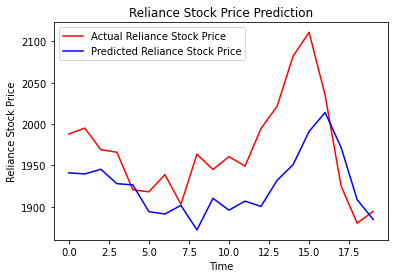

In [75]:
plt.plot(actual_price, color = 'red', label = 'Actual Reliance Stock Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Reliance Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()

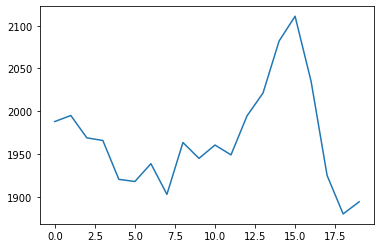

In [76]:
plt.plot(actual_price)